<a href="https://colab.research.google.com/github/aaravpanchal/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Credit Card Default Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Submitted by**    - Aarav Panchal


# **Project Summary -**

In recent years, the credit card issuers in Taiwan faced the cash and credit card debt crisis and the delinquency is expected to peak in the third quarter of 2006 (Chou,2006). In order to increase market share, card-issuing banks in Taiwan over-issued cash and credit cards to unqualified applicants. At the same time, most cardholders, irrespective of their repayment ability, overused credit card for consumption and accumulated heavy credit and cash–card debts. The crisis caused the blow to consumer finance confidence and it is a big challenge for both banks and cardholders.

This Project Aims to create a predictive model that will help banks to predict whether the user default next month. Which will further help them to take prevention measures.

Our Project Workflow:

*  Importing Libraries

*  Loading the dataset

*  Data Cleaning

*  EDA on features

*  Hypothesis Testing

*  Feature selection

*  Fitting the regression models

*  HyperParameter Tuning

*  Evaluation Metrices of the model

*  Final selection of the model

*  Conclusion

Libraries we will use to perform these:

*  Data wrangling : Numpy and Pandas

*  Data Visualization : Matplotlib and Seaborn

*  Hypothesis Testing: Scipy

*  Machine learning : Scikit Learn and XGBoost

# **GitHub Link -**

https://github.com/aaravpanchal/Credit-Card-Default-Prediction

# **Problem Statement**


We are required to do:

*  Understand, prep the data and make it ready for training.

*  Understand the target feature and its distribution

*  Assessing target features for class imbalance.

*  Modeling

*  Evaluation while keeping class imbalance in mind.

*  Feature Importance and Conclusion

*  Understanding how this project is useful to stakeholders.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,confusion_matrix

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_excel('/content/drive/MyDrive/Copy of default of credit card clients.xls')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


We can see, Data is deteriorated, feture names are in first row. Lets fix this.

In [4]:
df.columns = df.iloc[0]
df=df.drop(0).reset_index(drop=True)

In [5]:
df.index=df['ID']

In [6]:
df.drop(['ID'],inplace=True,axis=1)

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("Total raws are",df.shape[0])
print("Total Columns are" ,len(df.columns))

Total raws are 30000
Total Columns are 24


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  object
 1   SEX                         30000 non-null  object
 2   EDUCATION                   30000 non-null  object
 3   MARRIAGE                    30000 non-null  object
 4   AGE                         30000 non-null  object
 5   PAY_0                       30000 non-null  object
 6   PAY_2                       30000 non-null  object
 7   PAY_3                       30000 non-null  object
 8   PAY_4                       30000 non-null  object
 9   PAY_5                       30000 non-null  object
 10  PAY_6                       30000 non-null  object
 11  BILL_AMT1                   30000 non-null  object
 12  BILL_AMT2                   30000 non-null  object
 13  BILL_AMT3                   30000 non-null  ob

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

35

In [ ]:
#keeping only unique values.
df=df[~df.duplicated()]

In [ ]:
#lets check again.
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

### What did you know about your dataset?

There are around information of three thousand people and have 24 features to explain it. Data had very few duplicate values, which we have treated. Now our dat is clean. lets move further.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [ ]:
# Dataset Describe
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,29965,29965,29965,29965,29965,29965,29965,29965,29965,29965,...,29965,29965,29965,29965,29965,29965,29965,29965,29965,29965
unique,81,2,7,4,56,11,11,11,11,10,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,50000,2,2,2,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,3363,18091,14019,15945,1602,14737,15730,15764,16455,16947,...,3165,3476,3990,5218,5365,5937,6377,6672,7142,23335


### Variables Description 

This information was not available AlmaBetter. So I procured this from https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

*  ID: ID of each client
*  LIMIT_BAL: Amount of given credit in NT dollars (includes individual  and      family/supplementary credit
*  SEX: Gender (1=male, 2=female)
*  EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
*  MARRIAGE: Marital status (1=married, 2=single, 3=others)
*  AGE: Age in years
*  PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months,8=payment delay for eight months, 9=payment delay for nine months and above)
*  PAY_2: Repayment status in August, 2005 (scale same as above)
*  PAY_3: Repayment status in July, 2005 (scale same as above)
*  PAY_4: Repayment status in June, 2005 (scale same as above)
*  PAY_5: Repayment status in May, 2005 (scale same as above)
*  PAY_6: Repayment status in April, 2005 (scale same as above)
*  BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
*  BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
*  BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
*  BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
*  BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
*  BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
*  PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
*  PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
*  PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
*  PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
*  PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
*  PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns:
  print("Unique values of",i,"is",df[i].nunique())

Unique values of LIMIT_BAL is 81
Unique values of SEX is 2
Unique values of EDUCATION is 7
Unique values of MARRIAGE is 4
Unique values of AGE is 56
Unique values of PAY_0 is 11
Unique values of PAY_2 is 11
Unique values of PAY_3 is 11
Unique values of PAY_4 is 11
Unique values of PAY_5 is 10
Unique values of PAY_6 is 10
Unique values of BILL_AMT1 is 22723
Unique values of BILL_AMT2 is 22346
Unique values of BILL_AMT3 is 22026
Unique values of BILL_AMT4 is 21548
Unique values of BILL_AMT5 is 21010
Unique values of BILL_AMT6 is 20604
Unique values of PAY_AMT1 is 7943
Unique values of PAY_AMT2 is 7899
Unique values of PAY_AMT3 is 7518
Unique values of PAY_AMT4 is 6937
Unique values of PAY_AMT5 is 6897
Unique values of PAY_AMT6 is 6939
Unique values of default payment next month is 2


In [ ]:
df.MARRIAGE.value_counts()

2    15945
1    13643
3      323
0       54
Name: MARRIAGE, dtype: int64

In [ ]:
df.EDUCATION.value_counts()

2    14019
1    10563
3     4915
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
df.PAY_0.value_counts()

 0    14737
-1     5682
 1     3667
-2     2750
 2     2666
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

Unique values of these variable differ from the information available. lets treat them.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Handling Missing Values & Missing Value Imputation
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2    14019
1    10563
3     4915
4      468
Name: EDUCATION, dtype: int64

In [ ]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    15945
1    13643
3      377
Name: MARRIAGE, dtype: int64

In [ ]:
fil = (df.PAY_0 == -1) | (df.PAY_0==-2)
df.loc[fil,'PAY_0']=0

fil = (df.PAY_2 == -1) | (df.PAY_2==-2)
df.loc[fil,'PAY_2']=0

fil = (df.PAY_3 == -1) | (df.PAY_3==-2)
df.loc[fil,'PAY_3']=0

fil = (df.PAY_4 == -1) | (df.PAY_4==-2)
df.loc[fil,'PAY_4']=0

fil = (df.PAY_5 == -1) | (df.PAY_5==-2)
df.loc[fil,'PAY_5']=0

fil = (df.PAY_6 == -1) | (df.PAY_6==-2)
df.loc[fil,'PAY_6']=0


### What all manipulations have you done and insights you found?

I have treated the some variable with different unique variables than shown in variable description. 

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Defaulter vs Non Defaulter

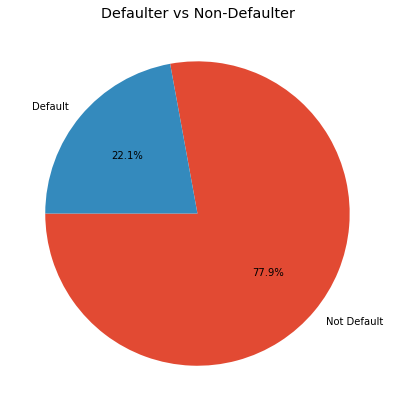

In [ ]:
#defaulter vs non defaulter
plt.style.use('ggplot')
plt.figure(figsize=(13,7))
plt.title("Defaulter vs Non-Defaulter")
g = plt.pie(df['default payment next month'].value_counts(), labels=['Not Default','Default'],autopct='%1.1f%%', startangle=180)
plt.show()

##### 1. Why did you pick the specific chart?

This gives us clear picture of distribution of our Target Variable.

##### 2. What is/are the insight(s) found from the chart?

Around 20% of the payments are default. Its a huge number.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This chart actually gives us motive to make a prediction model. so that these transections should be stopped.

#### Defaulter/Non-Defaulter vs Education

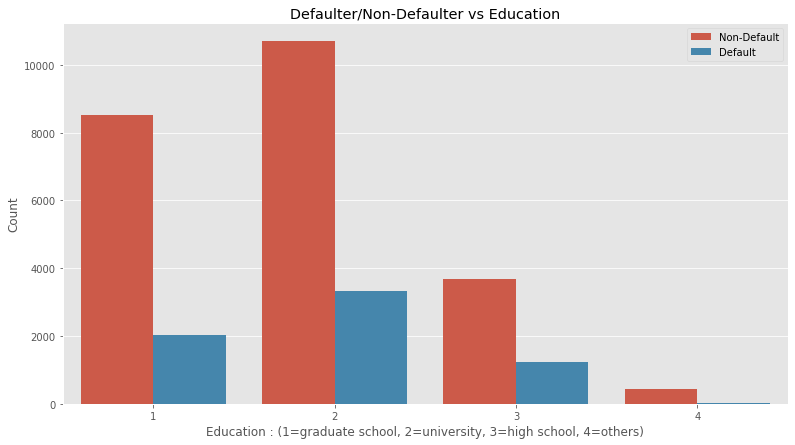

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(13,7))
sns.countplot(x='EDUCATION',data=df,hue='default payment next month')
plt.title("Defaulter/Non-Defaulter vs Education")
plt.ylabel("Count")
plt.xlabel("Education : (1=graduate school, 2=university, 3=high school, 4=others)")
plt.legend(['Non-Default','Default',])
plt.show()

0 was not specified in the variable description. we will treat it later.

##### 1. Why did you pick the specific chart?

It shows the literate group that mostly found to default.

##### 2. What is/are the insight(s) found from the chart?

University students are highest to use credit cards and to default as well followed by gradute school and high school.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Banks should put on regulations on the basis of education and background. 

#### Defaulter/Non-Defaulter vs Marriage

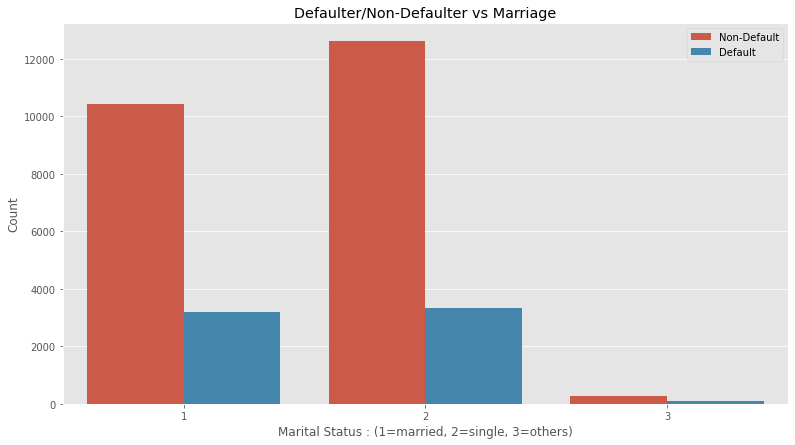

In [ ]:
# maritial status
plt.style.use('ggplot')
plt.figure(figsize=(13,7))
plt.title("Defaulter/Non-Defaulter vs Marriage")
sns.countplot(x='MARRIAGE',data=df,hue='default payment next month')
plt.ylabel("Count")
plt.xlabel("Marital Status : (1=married, 2=single, 3=others)")
plt.legend(['Non-Default','Default',])
plt.show()

##### 1. Why did you pick the specific chart?

This chart depicts the marital status of credit card holders.

##### 2. What is/are the insight(s) found from the chart?

Unmarried people tend to have more credit cards than married but the difference is not that much.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is no significant differece between married and unmarried people getting default. It does not signify any business impact as per data.

#### Male vs Female

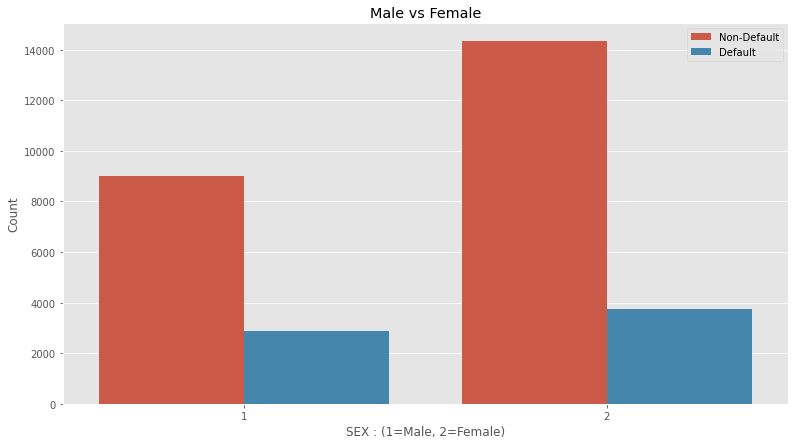

In [ ]:
# Male vs Female
plt.style.use('ggplot')
plt.figure(figsize=(13,7))
plt.title("Male vs Female")
sns.countplot(x='SEX',data=df,hue='default payment next month')
plt.ylabel("Count")
plt.xlabel("SEX : (1=Male, 2=Female)")
plt.legend(['Non-Default','Default',])
plt.show()

##### 1. Why did you pick the specific chart?

It shows the difference between male and female default ratio.

##### 2. What is/are the insight(s) found from the chart?

It is clear that female tend to have more defaults than male. Females are the major user of credit cards.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Females are the major revenue for credit cards. Banks need to create some new policies to reduce the defaults.

#### Repayment Status

In [ ]:
def getColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]

In [ ]:
df.rename(columns={'PAY_0':'PAY_1'},inplace = True)

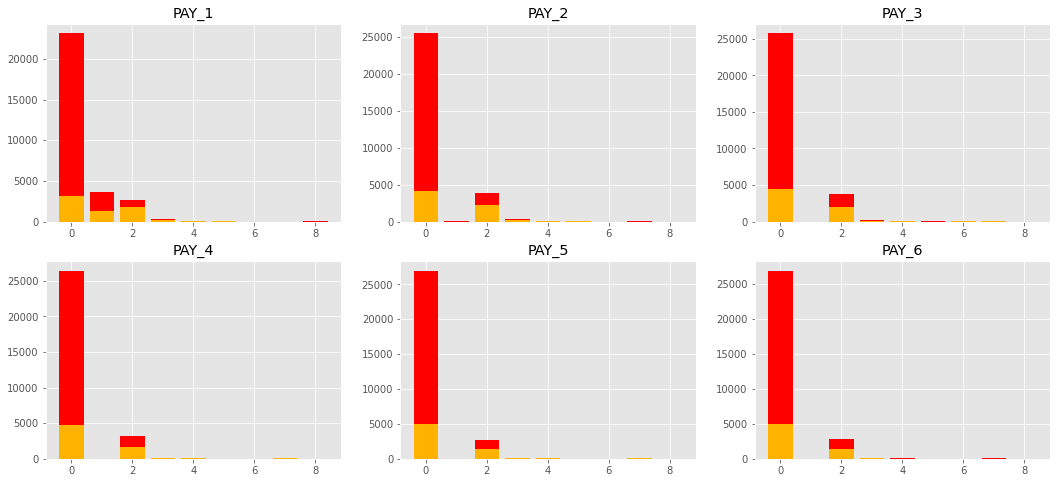

In [ ]:
# PAY_1 , PAY_2 , PAY_3 , PAY_4 , PAY_5, PAY_6

pay_status_columns = getColumnsNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = df[pay_status_columns[i]].value_counts()
    x = df[pay_status_columns[i]][(df['default payment next month']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='red')
    ax[row,col].bar(x.index, x, align='center', color='yellow', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])
   


    
plt.show()

##### 1. Why did you pick the specific chart?

The above figure shows bar plot for each month payment status which show the count of defaulters and non-defaulter.

##### 2. What is/are the insight(s) found from the chart?

Most of the payments are paid duly. Majory time delayed to pay is 2 months.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, delay after 2 months should not be toelerated and user can be charged.

#### Distribution of Previous Payments.

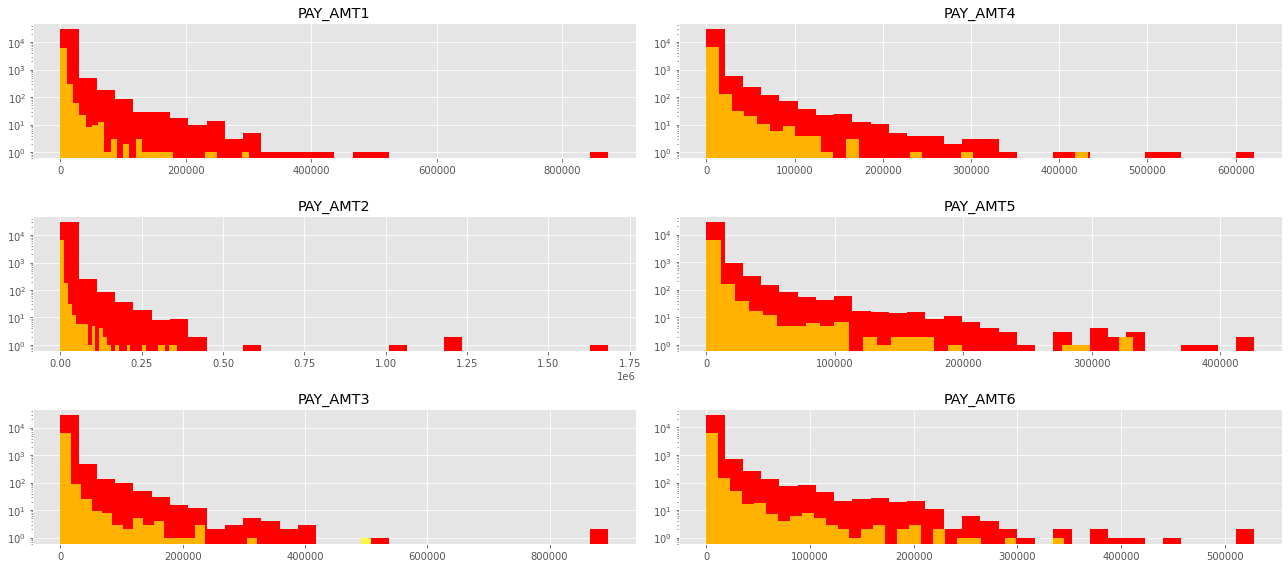

In [ ]:
pay_amt_columns = getColumnsNames('PAY_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(df[pay_amt_columns[i]], 30, color ='red')
    ax[row,col].hist(df[pay_amt_columns[i]][(df['default payment next month']==1)],30,color='yellow',alpha = 0.7)
    ax[row,col].set_title(pay_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The above histogram shows the distribution of payment amount for each month explicitly for defaulters and non-defaulters.

##### 2. What is/are the insight(s) found from the chart?

Payments are right skewed. Few percent of data makes higher payment. lets check distribution of bill amounts, we will get to know better.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, amount getting paid is less each month than bill generated that helps banks to gain more interest.

#### Ditribution of previous bill payments.

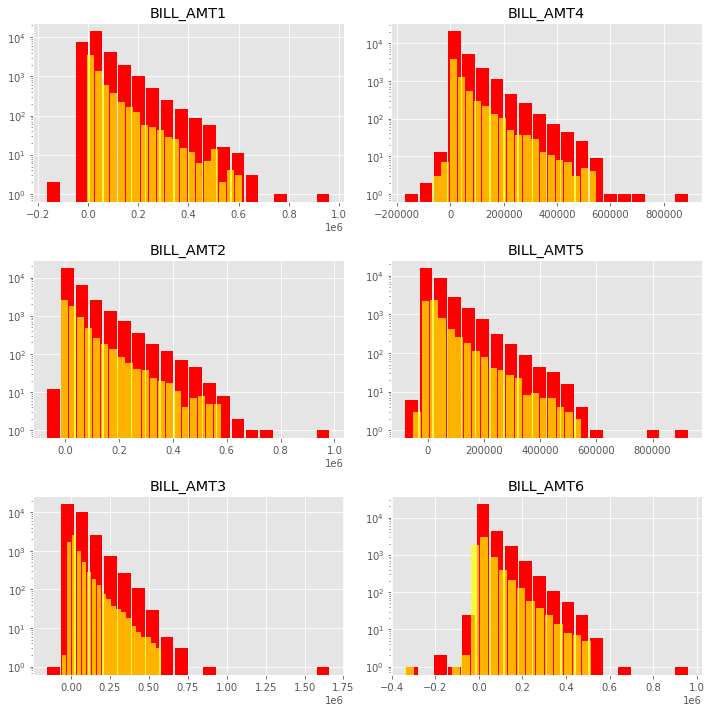

In [ ]:
bill_atm_columns =  getColumnsNames('BILL_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(10,10)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(df[bill_atm_columns[i]], 20,rwidth=0.9, color ='red')
    ax[row,col].hist(df[bill_atm_columns[i]][(df['default payment next month']==1)],20,rwidth=0.9,color='yellow',alpha = 0.7)
    ax[row,col].set_title(bill_atm_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The above histogram shows the distribution of Bill amount generated for each month explicitly for defaulters and non-defaulters

##### 2. What is/are the insight(s) found from the chart?

Distribution of bill generated in april is following normal distribution where as the distriubtion in payment made in april was right skewed. That means payments were not made fully moslty in month of april. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, People are spending more in the end of financial year. Banks are giving offers to make revenue till the end of march. People are spending more than they could pay.

#### Age Group

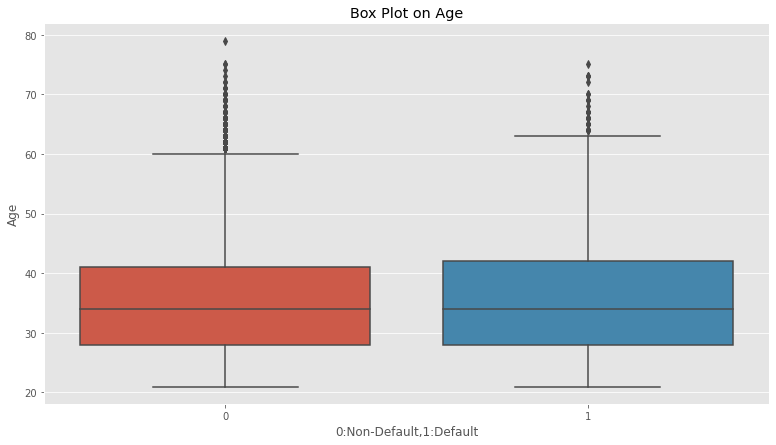

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(13,7))
plt.title("Box Plot on Age")
sns.boxplot(x='default payment next month',y='AGE',data=df)
plt.ylabel("Age")
plt.xlabel('0:Non-Default,1:Default')
plt.show()

##### 1. Why did you pick the specific chart?

this chart depicts the age group of most number of users.

##### 2. What is/are the insight(s) found from the chart?

Major number of users are aged from 30 to 40 years and even defaulters are in the same group.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Banks can target different age group by providing various offer to increase revenue. Here, Defaulters and Non-Defaulters are in the same age group, so this insight do contribute to business.

#### Age vs Marriage

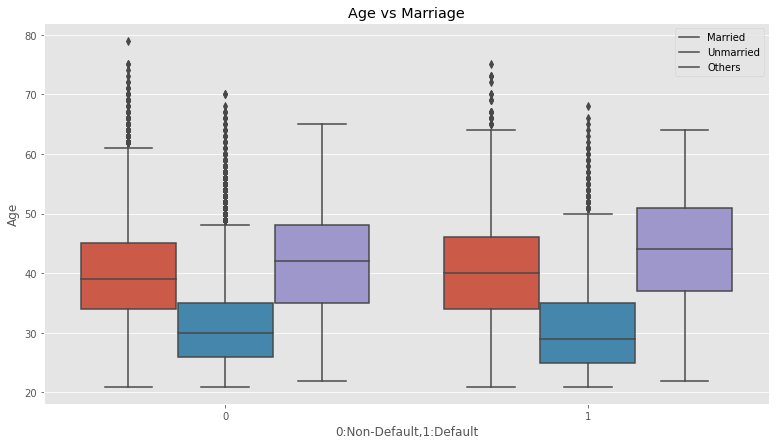

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(13,7))
plt.title("Age vs Marriage")
sns.boxplot(x='default payment next month',hue='MARRIAGE', y='AGE',data=df)
plt.ylabel("Age")
plt.xlabel('0:Non-Default,1:Default')
plt.legend(['Married','Unmarried','Others'])
plt.show()

##### 1. Why did you pick the specific chart?

This multivariate analysis helps us to get different age group according to their marital stauts.

##### 2. What is/are the insight(s) found from the chart?

Most married users using credit cards are aged between 35 to 45 and unmarried users are aged between 25 to 35. where as others are aged between 35 to 50. That can be possible that they married users.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The age group is same in both cases. so it does not give business impact.

#### Age vs Education

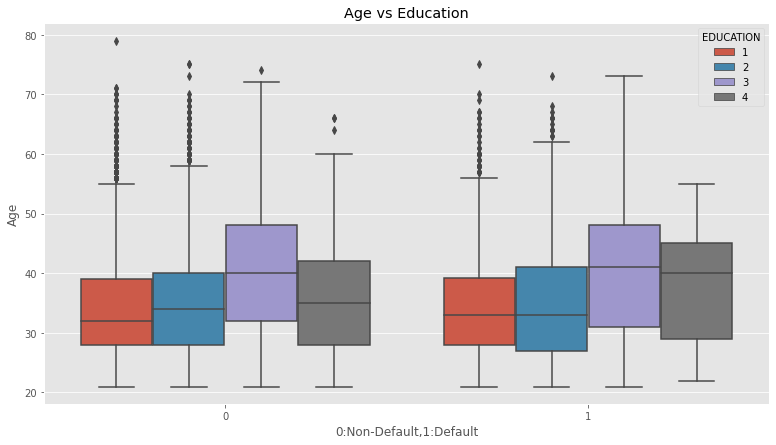

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(13,7))
plt.title("Age vs Education")
sns.boxplot(x='default payment next month',hue='EDUCATION', y='AGE',data=df)
plt.ylabel("Age")
plt.xlabel('0:Non-Default,1:Default')
plt.show()

##### 1. Why did you pick the specific chart?

It depicts the age group on the basis of education.

##### 2. What is/are the insight(s) found from the chart?

Interestingly, high school group is aged more, ranges from 35 to 45. it tend to deafualt the same.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Even This chart does not help us finding the difference between deafualts and non defaulters.

#### Credit Limit vs Sex

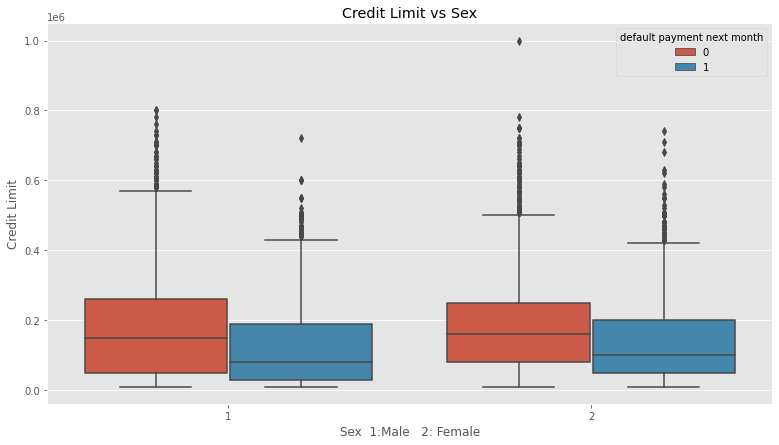

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(13,7))
plt.title("Credit Limit vs Sex")
sns.boxplot(x='SEX',y='LIMIT_BAL',hue='default payment next month',data=df)
plt.ylabel("Credit Limit")
plt.xlabel('Sex  1:Male   2: Female')
plt.show()

##### 1. Why did you pick the specific chart?

This chart shows us the major diffence between defaulters and no defaulters credit range while considering the sex.

##### 2. What is/are the insight(s) found from the chart?

Defaulters have less credit limit than non defaulters not going avove 20000 Dollors.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Users with less limit tend to default more. Banks can create the lower limit so that some defaulters can be eliminated.

#### Credit Limit vs Education

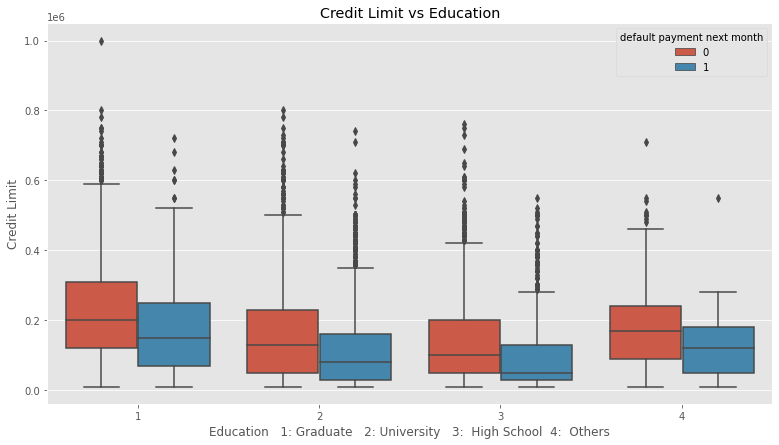

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(13,7))
plt.title("Credit Limit vs Education")
sns.boxplot(x='EDUCATION',y='LIMIT_BAL',hue='default payment next month',data=df)
plt.ylabel("Credit Limit")
plt.xlabel('Education   1: Graduate   2: University   3:  High School  4:  Others')
plt.show()

##### 1. Why did you pick the specific chart?

This chart shows the credit limit of different education group white considering default payment.

##### 2. What is/are the insight(s) found from the chart?

Credit limit is majorly more in graduated users and lowest in high school users. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In previous charts it is shown that high school group is aged the most and here the credit limit of the higher school is less. That clearly states more the age lesser the credit limit.

#### Credit Limit vs Marriage

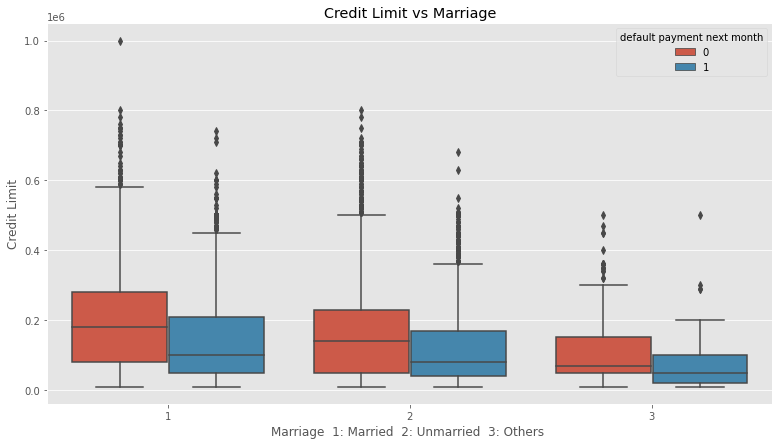

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(13,7))
plt.title("Credit Limit vs Marriage")
sns.boxplot(x='MARRIAGE',y='LIMIT_BAL',hue='default payment next month',data=df)
plt.ylabel("Credit Limit")
plt.xlabel('Marriage  1: Married  2: Unmarried  3: Others ')
plt.show()

##### 1. Why did you pick the specific chart?

This chart shows credit limit of users of different marital status while considering the defaults.

##### 2. What is/are the insight(s) found from the chart?

Married user tend to have more credit limit than unmarried users. defaulters in married users do have more credit limit.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

here also, a lower limit should be decided. when issuing a credit card with less amount, a backgroud check should retictly followed.

#### Correlation Heatmap

Text(0.5, 1.0, 'Heatmap')

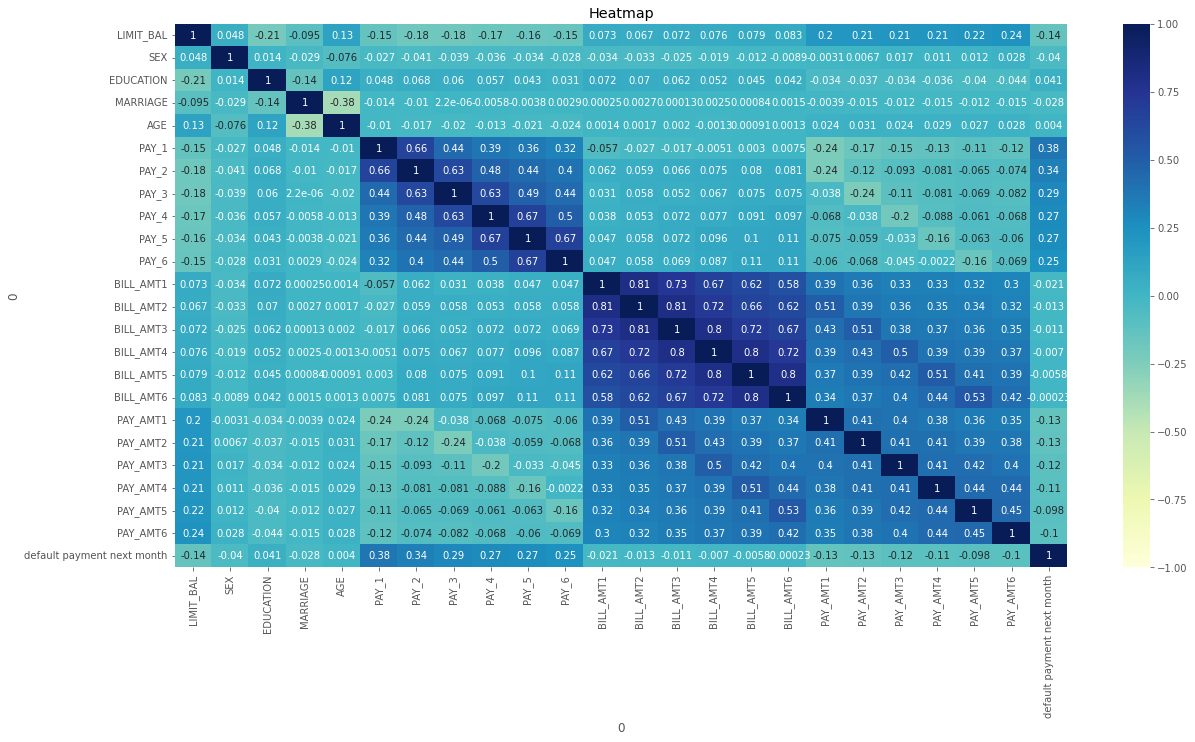

In [ ]:

plt.figure(figsize=(20,10))
sns.heatmap(df.astype(float).corr(method='kendall'), cmap="YlGnBu", annot=True,vmin=-1,vmax=1)
plt.title('Heatmap')

##### 1. Why did you pick the specific chart?

This chart shows the the correlation between each factors.

##### 2. What is/are the insight(s) found from the chart?

There is not strong correlation between fetures except bill amount and payment made. that totally make sense.

#### Pair Plot 

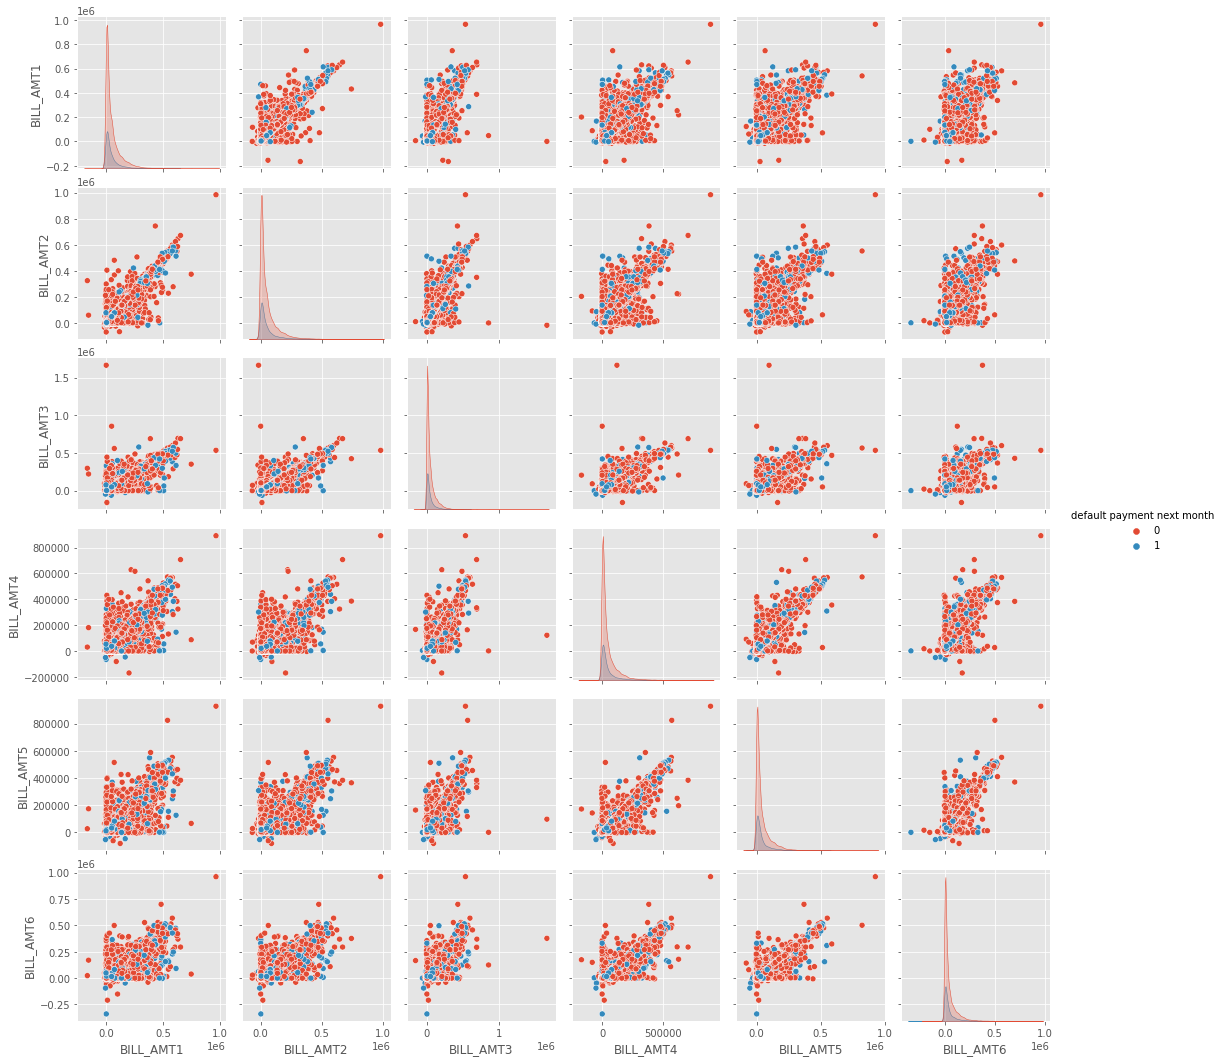

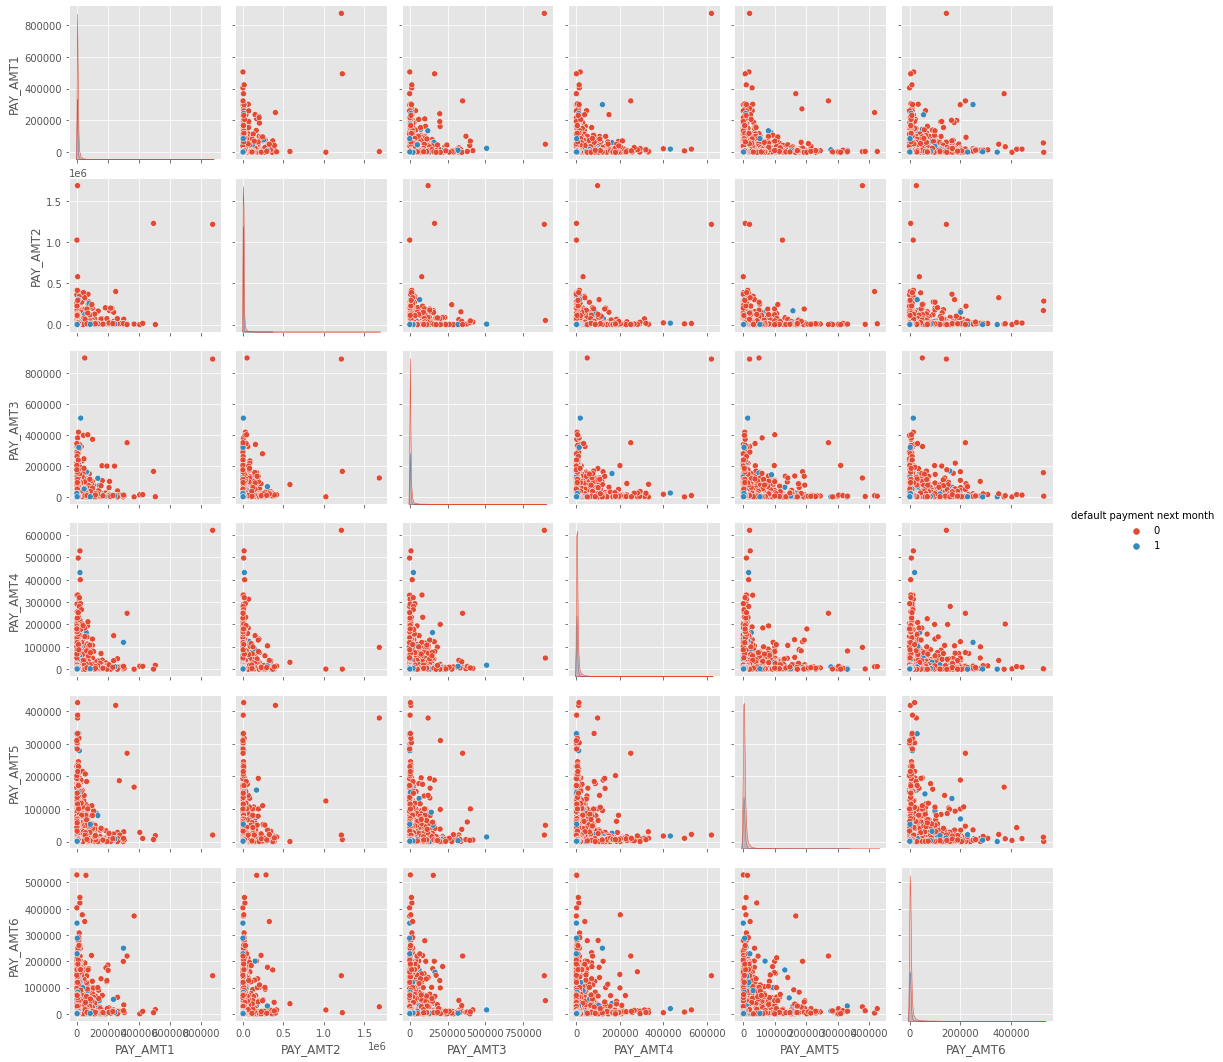

In [ ]:

# plot columns with similar names to check the correlation

sns.pairplot(df, vars=df.columns[11:17], kind='scatter',hue= 'default payment next month')
sns.pairplot(df, vars=df.columns[17:23],hue = 'default payment next month')

##### 1. Why did you pick the specific chart?

This chart depicts the relationship between each and evry feature of bills and payments made.

##### 2. What is/are the insight(s) found from the chart?

Bills kind of follows linear relationship. That means users are spending similar amount each month. where as payment amount is different each month.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: Maritial Status did not have any affect on default payment.

Alternate hypothesis: Maritial Status have affected default payment

#### 2. Perform an appropriate statistical test.

In [12]:
# Perform Statistical Test to obtain P-Value
married_sample = np.array([np.mean(df[df["MARRIAGE"]==1].sample(20)["default payment next month"].values) for i in range(100)])
single_sample = np.array([np.mean(df[df["MARRIAGE"]==2].sample(20)["default payment next month"].values) for i in range(100)])

In [26]:
import scipy.stats

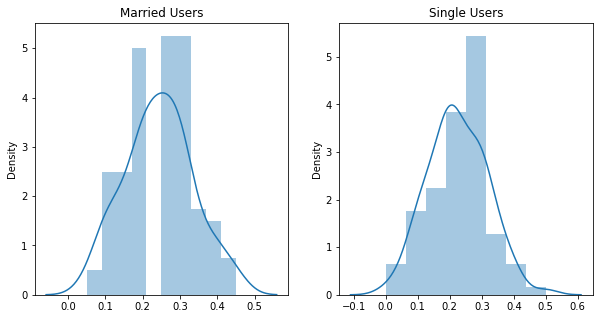

In [14]:
plt.subplots(1, 2, figsize = (10, 5))
plt.subplot(1,2, 1)
sns.distplot(married_sample)
plt.title("Married Users")
plt.subplot(1, 2, 2)
sns.distplot(single_sample)
plt.title("Single Users")
plt.show()

Our samples are normally distributed, we can calculate z score here. Lets keep our significance level at 5%.

In [15]:
effect = np.mean(single_sample) - np.mean(married_sample)
sigma_first = np.std(single_sample)
sigma_third = np.std(married_sample)
sigma_difference = np.sqrt((sigma_first**2)/len(single_sample)  +  (sigma_third**2)/len(married_sample))
z_score = effect / sigma_difference

In [16]:
z_score

-1.4699341038425435

In [27]:
#p-value
scipy.stats.norm.sf(abs(z_score))*2

0.14157960190760058

We have obtained p-value to be more that 5%, hence we accept our null hypothesis.

##### Which statistical test have you done to obtain P-Value?

I have used z-score to calculate p-value.

##### Why did you choose the specific statistical test?

Our predictor varaible and Outcome variable is categorical thats why I have choosen this test.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: Gender did not have any affect on default payment.

Altenate Hypothesis: Gender has affectedd default payment.

#### 2. Perform an appropriate statistical test.

In [28]:
# Perform Statistical Test to obtain P-Value
male_sample = np.array([np.mean(df[df["SEX"]==1].sample(20)["default payment next month"].values) for i in range(100)])
female_sample = np.array([np.mean(df[df["SEX"]==2].sample(20)["default payment next month"].values) for i in range(100)])

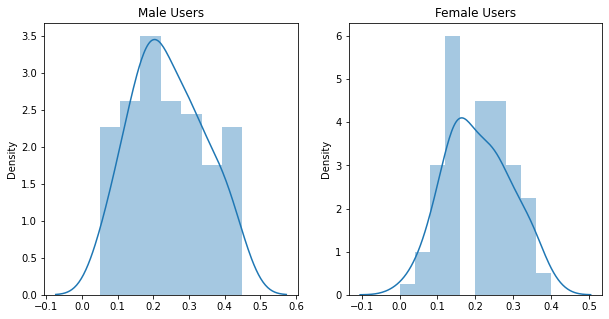

In [29]:
plt.subplots(1, 2, figsize = (10, 5))
plt.subplot(1,2, 1)
sns.distplot(male_sample)
plt.title("Male Users")
plt.subplot(1, 2, 2)
sns.distplot(female_sample)
plt.title("Female Users")
plt.show()

In [30]:
effect = np.mean(female_sample) - np.mean(male_sample)
sigma_first = np.std(female_sample)
sigma_third = np.std(male_sample)
sigma_difference = np.sqrt((sigma_first**2)/len(female_sample)  +  (sigma_third**2)/len(male_sample))
z_score = effect / sigma_difference

In [31]:
z_score

-2.6409750513252823

In [32]:
scipy.stats.norm.sf(abs(z_score))*2

0.008266780667643199

P-value is very less. Hence, we reject our null hypthesis.

##### Which statistical test have you done to obtain P-Value?

I have used z-score to calculate p-value.

##### Why did you choose the specific statistical test?

Our predictor varaible and Outcome variable is categorical thats why I have choosen this test.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: Education has no effect on default payment.
Alternate Hypothesis: Education affected default payment.

#### 2. Perform an appropriate statistical test.

In [33]:
# Perform Statistical Test to obtain P-Value
graduate_sample = np.array([np.mean(df[df["EDUCATION"]==1].sample(20)["default payment next month"].values) for i in range(100)])
university_sample = np.array([np.mean(df[df["EDUCATION"]==2].sample(20)["default payment next month"].values) for i in range(100)])

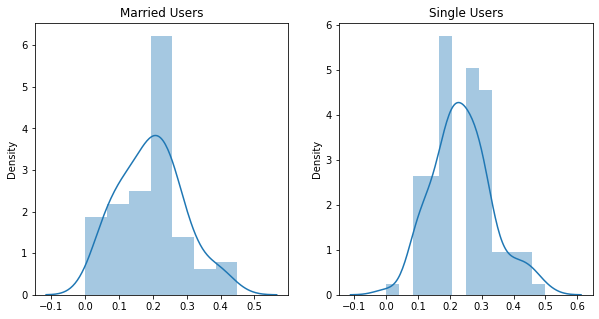

In [35]:
plt.subplots(1, 2, figsize = (10, 5))
plt.subplot(1,2, 1)
sns.distplot(graduate_sample)
plt.title("Married Users")
plt.subplot(1, 2, 2)
sns.distplot(university_sample)
plt.title("Single Users")
plt.show()

In [36]:
effect = np.mean(university_sample) - np.mean(graduate_sample)
sigma_first = np.std(university_sample)
sigma_third = np.std(graduate_sample)
sigma_difference = np.sqrt((sigma_first**2)/len(university_sample)  +  (sigma_third**2)/len(graduate_sample))
z_score = effect / sigma_difference

In [37]:
z_score

3.282302759938829

In [38]:
scipy.stats.norm.sf(abs(z_score))*2

0.0010296298960680425

P-value is very less, We reject null hypothesis.

##### Which statistical test have you done to obtain P-Value?

I have used z-score to calculate p-value.

##### Why did you choose the specific statistical test?

Our predictor varaible and Outcome variable is categorical thats why I have choosen this test.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

We dont have any missing values.

### 2. Data Scaling

In [ ]:
# Scaling your data
df.columns = df.columns.map(str.lower)
col_to_norm = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6']
df[col_to_norm] =df[col_to_norm].apply(lambda x : (x-np.mean(x))/np.std(x))

In [ ]:
df.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,-1.136285,2,2,1,-1.246078,2,2,0,0,0,...,-0.673064,-0.663612,-0.653264,-0.342158,-0.227257,-0.296984,-0.308253,-0.314331,-0.293562,1
2,-0.365619,2,2,2,-1.029141,0,2,0,0,0,...,-0.622219,-0.606802,-0.598525,-0.342158,-0.213767,-0.240218,-0.244454,-0.314331,-0.181119,1
3,-0.596819,2,2,2,-0.161397,0,0,0,0,0,...,-0.450369,-0.417822,-0.392257,-0.250556,-0.192078,-0.240218,-0.244454,-0.248912,-0.012453,0
4,-0.905085,2,2,1,0.164007,0,0,0,0,0,...,-0.233081,-0.187439,-0.157286,-0.22147,-0.169565,-0.228864,-0.238074,-0.244398,-0.23734,0
5,-0.905085,1,2,1,2.333368,0,0,0,0,0,...,-0.347669,-0.348795,-0.33213,-0.22147,1.334009,0.27068,0.265939,-0.269257,-0.255388,0


##### I have standarized data using z score fomulation.

## ***7. ML Model Implementation***

In [ ]:
X = df.iloc[:,:-1].values
y = df['default payment next month'].values
y=y.astype('int')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

### Logistic Regression

In [ ]:
logmodel = LogisticRegression(random_state=1)
logmodel.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [ ]:
y_pred = logmodel.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm0 = confusion_matrix(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.815239,0.680498,0.326531,0.441305,0.641205


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
logmodel_params = {'C': [0.001, 0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(estimator=logmodel,param_grid=logmodel_params,scoring='accuracy',cv=10,n_jobs=-1)
grid_search_log = grid_search.fit(X_train,y_train)
best_accuracy = grid_search_log.best_score_
print('Accuracy on Cross Validation set :',best_accuracy)
best_parameters = grid_search_log.best_params_
print('Best parameters are:',best_parameters)
y_pred_log = grid_search_log.predict(X_test)
roc=roc_auc_score(y_test, y_pred_log)
acc = accuracy_score(y_test, y_pred_log)
prec = precision_score(y_test, y_pred_log)
rec = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)
cm1 = confusion_matrix(y_test, y_pred_log)
results2 =  pd.DataFrame([['Logistic Regression Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results= results.append(results2, ignore_index = True)
results

Accuracy on Cross Validation set : 0.8182115673896115
Best parameters are: {'C': 1, 'class_weight': None, 'penalty': 'l2'}


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.815239,0.680498,0.326531,0.441305,0.641205
1,Logistic Regression Tuned,0.815239,0.680498,0.326531,0.441305,0.641205


##### Which hyperparameter optimization technique have you used and why?

I have used GridsearchCv to find the best parameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Model has not improved, I beilve base model was working well.

### K-Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = knn.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm2 = confusion_matrix(y_test, y_pred)

results2 = pd.DataFrame([['K-Nearest Neighbour', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results= results.append(results2, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.815239,0.680498,0.326531,0.441305,0.641205
1,Logistic Regression Tuned,0.815239,0.680498,0.326531,0.441305,0.641205
2,K-Nearest Neighbour,0.800779,0.590682,0.353410,0.442230,0.641466


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
k_range = list(range(1, 30))
leaf_size = list(range(1,30))
weight_options = ['uniform', 'distance']
knn_param = {'n_neighbors': k_range, 'leaf_size': leaf_size, 'weights': weight_options}
random_search = RandomizedSearchCV(estimator = knn,param_distributions = knn_param,scoring='accuracy',cv=5,n_jobs=-1)
random_search = random_search.fit(X_train,y_train)
best_accuracy_1 = random_search.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)
best_parameters = random_search.best_params_
print("Best Parameters are",best_parameters)
y_pred_KNN = random_search.predict(X_test)
roc=roc_auc_score(y_test, y_pred_KNN)
acc = accuracy_score(y_test, y_pred_KNN)
prec = precision_score(y_test, y_pred_KNN)
rec = recall_score(y_test, y_pred_KNN)
f1 = f1_score(y_test, y_pred_KNN)
cm3 = confusion_matrix(y_test, y_pred_KNN)
model =  pd.DataFrame([['KNN Model Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model, ignore_index = True)
results

Accuracy on Cross Validation set : 0.8159713945172825
Best Parameters are {'weights': 'distance', 'n_neighbors': 29, 'leaf_size': 26}


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.815239,0.680498,0.326531,0.441305,0.641205
1,Logistic Regression Tuned,0.815239,0.680498,0.326531,0.441305,0.641205
2,K-Nearest Neighbour,0.800779,0.590682,0.353410,0.442230,0.641466
3,KNN Model Tuned,0.807564,0.625789,0.345445,0.445157,0.642999


##### Which hyperparameter optimization technique have you used and why?

I have used RandomizedSearchCv as Gridsearch would take lot of time.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Overall accuracy has improved a bit. Precision has been improved where as recall has been detoriorated a bit.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Accuracy indicates overall correct predictions out of total predictions of the model. Precision is true predictions out of overall predictions. Recall stands of True prediction out of Actual True values. F1 score is calculated using precision and recall. ROC stands for how well model has predicted.
Our focus is on recall. We dont want to miss out on actual defaulters.

### Naive Bayes

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)
GaussianNB(priors=None)
y_pred =naive_bayes.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm4 = confusion_matrix(y_test, y_pred)

model= pd.DataFrame([['Gaussian Naive Bayes', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results= results.append(model, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.815239,0.680498,0.326531,0.441305,0.641205
1,Logistic Regression Tuned,0.815239,0.680498,0.326531,0.441305,0.641205
2,K-Nearest Neighbour,0.800779,0.590682,0.353410,0.442230,0.641466
3,KNN Model Tuned,0.807564,0.625789,0.345445,0.445157,0.642999
4,Gaussian Naive Bayes,0.767186,0.481595,0.547038,0.512235,0.688789


### Random Forest

In [ ]:
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
cm5 = confusion_matrix(y_test, y_pred)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Random tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results= results.append(model, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.815239,0.680498,0.326531,0.441305,0.641205
1,Logistic Regression Tuned,0.815239,0.680498,0.326531,0.441305,0.641205
2,K-Nearest Neighbour,0.800779,0.590682,0.353410,0.442230,0.641466
3,KNN Model Tuned,0.807564,0.625789,0.345445,0.445157,0.642999
4,Gaussian Naive Bayes,0.767186,0.481595,0.547038,0.512235,0.688789
5,Random tree Classifier,0.810456,0.631579,0.364360,0.462121,0.651597


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
param_grid_rf = {'n_estimators': [200, 400, 600, 1000],
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced',None]}
random_search = RandomizedSearchCV(estimator=rfc,param_distributions=param_grid_rf,scoring='accuracy',cv=5,n_jobs=-1)
random_search = random_search.fit(X_train,y_train)
best_accuracy_1 = random_search.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)
best_parameters_2 = random_search.best_params_
print('best parameters are',best_parameters_2)
y_pred_rf = random_search.predict(X_test)
roc=roc_auc_score(y_test, y_pred_rf)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
cm6 = confusion_matrix(y_test, y_pred_rf)
model=  pd.DataFrame([['Random Forest Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results= results.append(model, ignore_index = True)
results

Accuracy on Cross Validation set : 0.8201191895113231
best parameters are {'n_estimators': 1000, 'criterion': 'entropy', 'class_weight': None}


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.815239,0.680498,0.326531,0.441305,0.641205
1,Logistic Regression Tuned,0.815239,0.680498,0.326531,0.441305,0.641205
2,K-Nearest Neighbour,0.800779,0.590682,0.353410,0.442230,0.641466
3,KNN Model Tuned,0.807564,0.625789,0.345445,0.445157,0.642999
4,Gaussian Naive Bayes,0.767186,0.481595,0.547038,0.512235,0.688789
5,Random tree Classifier,0.810456,0.631579,0.364360,0.462121,0.651597
6,Random Forest Tuned,0.811791,0.635124,0.370831,0.468259,0.654761


##### Which hyperparameter optimization technique have you used and why?

I have used RandomizedSearchCv as Gridsearch would take lot of time.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Every Metric has improved a bit.

### XGBoost

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred =xgb.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
cm7 = confusion_matrix(y_test, y_pred)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['XGBOOST Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results= results.append(model, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.815239,0.680498,0.326531,0.441305,0.641205
1,Logistic Regression Tuned,0.815239,0.680498,0.326531,0.441305,0.641205
2,K-Nearest Neighbour,0.800779,0.590682,0.353410,0.442230,0.641466
3,KNN Model Tuned,0.807564,0.625789,0.345445,0.445157,0.642999
4,Gaussian Naive Bayes,0.767186,0.481595,0.547038,0.512235,0.688789
5,Random tree Classifier,0.810456,0.631579,0.364360,0.462121,0.651597
6,Random Forest Tuned,0.811791,0.635124,0.370831,0.468259,0.654761
7,XGBOOST Classifier,0.818576,0.672445,0.366849,0.474718,0.657712


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
param_grid_xgb ={'n_estimators': [50,100,150,200], 'max_depth': [3,5,7,10], 'min_child_weight': [2,3,4,5]}
random_search_xgb = RandomizedSearchCV(estimator=xgb,param_distributions=param_grid_xgb,scoring='accuracy',cv=5,n_jobs=-1)
random_search_xgb = random_search_xgb.fit(X_train,y_train)
best_accuracy_1 = random_search_xgb.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)
best_parameters_2 = random_search_xgb.best_params_
print('best parameters are',best_parameters_2)
y_pred_xgb = random_search_xgb.predict(X_test)
roc=roc_auc_score(y_test, y_pred_xgb)
acc = accuracy_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
cm8 = confusion_matrix(y_test, y_pred_xgb)
model =  pd.DataFrame([['XGBOOST Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results= results.append(model, ignore_index = True)
results

Accuracy on Cross Validation set : 0.8221215733015494
best parameters are {'n_estimators': 50, 'min_child_weight': 2, 'max_depth': 3}


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.815239,0.680498,0.326531,0.441305,0.641205
1,Logistic Regression Tuned,0.815239,0.680498,0.326531,0.441305,0.641205
2,K-Nearest Neighbour,0.800779,0.590682,0.353410,0.442230,0.641466
3,KNN Model Tuned,0.807564,0.625789,0.345445,0.445157,0.642999
4,Gaussian Naive Bayes,0.767186,0.481595,0.547038,0.512235,0.688789
5,Random tree Classifier,0.810456,0.631579,0.364360,0.462121,0.651597
6,Random Forest Tuned,0.811791,0.635124,0.370831,0.468259,0.654761
7,XGBOOST Classifier,0.818576,0.672445,0.366849,0.474718,0.657712
8,XGBOOST Tuned,0.819021,0.675229,0.366351,0.474992,0.657821


##### Which hyperparameter optimization technique have you used and why?

I have used RandomizedSearchCv as Gridsearch would take lot of time.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Every Metric except recall has improved a bit.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I would consider a model that performs best in Recall. Here, we will focus on the users who default. We need to stop that. For that even if we predict some users defaulters even if they dont. That wont make much of differece. We have to minimise defaulters as much as possible.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I will choose gaussian naive bayes as it perfomrs best in the recall.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Lets use Lime to explain our model and get the fetaure importance.

In [ ]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 4.7 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=3f38fc86d445be4fc4b269f437a9dd50c4c41cba7067537e29082c972efad539
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [ ]:
# LIME SECTION
import sklearn
import sklearn.datasets
import sklearn.ensemble
import numpy as np
import lime
import lime.lime_tabular
from __future__ import print_function

In [ ]:
feature_names= list(df.columns)
feature_names.pop()

'default payment next month'

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train ,feature_names = feature_names,class_names=['0','1'],
                                                    kernel_width=3)

In [ ]:
observation_1 = 2

In [ ]:
predict_fn = lambda x: naive_bayes.predict_proba(x).astype(float)

In [ ]:
exp = explainer.explain_instance(X_test[observation_1], predict_fn, num_features=23)
exp.show_in_notebook(show_all=False)

Here we can see that pay1 is most responsible feature that drags to be default.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**



*   XGBoost model performs the best in terms of overall accuracy.

*   Naive Bayes model performs the best in Recall.

*   Pay_0 feature is most responsible to make default payment.

*   Other Pay_ features are most responsible to prevent default payment.





### ***Hurrah! We have successfully completed our Machine Learning Capstone Project !!!***